In [1]:
# import proplot as pplt

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['svg.fonttype'] = 'none'
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.family'] = 'Arial'
matplotlib.rcParams['font.size'] = 12

In [3]:
df1 = pd.read_excel('NLL_TS(seed=6554)20230804.xlsx')
df2 = pd.read_excel('NLL_TS(seed=1234)20230802.xlsx')
df3 = pd.read_excel('NLL_TS(seed=5343)20230803.xlsx')
train_size = [1000, 10000, 100000, 500000, 1000000, 2000000, 2800000]
df1['Training size']=train_size
df2['Training size']=train_size
df3['Training size']=train_size
df1.drop('Unnamed: 0',axis=1,inplace=True)
df2.drop('Unnamed: 0',axis=1,inplace=True)
df3.drop('Unnamed: 0',axis=1,inplace=True)

df1.set_index('Training size',inplace=True)
df2.set_index('Training size',inplace=True)
df3.set_index('Training size',inplace=True)

## matplotlib 绘图

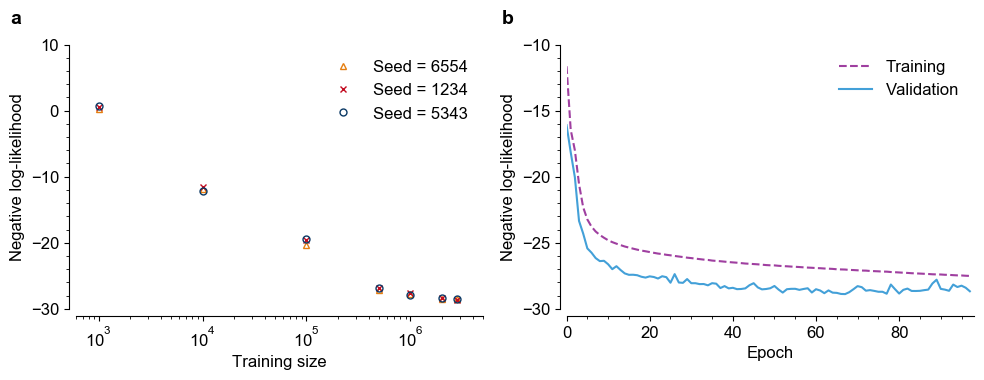

In [29]:
import matplotlib.pyplot as plt
df_loss = pd.read_excel("LossCurve_20230728-9.xls")
df_loss.drop('Unnamed: 0',axis=1,inplace=True)
fig, axs = plt.subplots(ncols=2, figsize=(10, 4)) 

ax = axs[0]
ax.plot(train_size, -df1.mean(axis=1), '^', markersize=5, markerfacecolor="none", color="#e57e11", label="Seed = 6554")
ax.plot(train_size, -df2.mean(axis=1), 'x', markersize=5, markerfacecolor="none", color="#c20b20", label="Seed = 1234") 
ax.plot(train_size, -df3.mean(axis=1), 'o', markersize=5, markerfacecolor="none", color="#0b3965", label="Seed = 5343")

ax.legend(loc='upper left', ncol=1) 

ax.set_xlabel('Training size')
ax.set_ylabel('Negative log-likelihood')
ax.set_xscale('log')
ax.set_xlim(600, 5000000)
ax.set_ylim(-30, 10)  
ax.tick_params(labelsize=12)


ax = axs[1]
ax.plot(df_loss.iloc[:,0], color='#9f3fa0', linestyle='--', label='Training')
ax.plot(df_loss.iloc[:,1], color='#43a0d8', linestyle='-', label='Validation')
ax.legend(loc='upper left', ncol=1)

ax.set_xlabel('Epoch')
ax.set_ylabel('Negative log-likelihood')
ax.set_xlim(0, len(df_loss.index))
ax.set_ylim(-30, -10)
ax.tick_params(labelsize=12)


# 隐藏上边和右边坐标轴
axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)

axs[1].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)

# x轴y轴偏移  
offset = 5
axs[0].spines['left'].set_position(('outward', offset))
axs[0].spines['bottom'].set_position(('outward', offset))

axs[1].spines['left'].set_position(('outward', offset))  
axs[1].spines['bottom'].set_position(('outward', offset))

# 添加子图编号

# 子图编号向左偏移与ylabel对齐
axs[0].text(-0.16, 1.08, 'a', transform=axs[0].transAxes,  
           fontsize=14, fontweight='bold')

axs[1].text(-0.16, 1.08, 'b', transform=axs[1].transAxes,
           fontsize=14, fontweight='bold')


# axs[0].text(-0.1, 1.1, 'a', transform=axs[0].transAxes,
#           fontsize=14, fontweight='bold')

# axs[1].text(-0.1, 1.1, 'b', transform=axs[1].transAxes,
#           fontsize=14, fontweight='bold')
          
# 设置图例       
axs[0].legend(loc='upper right', frameon=False)
axs[1].legend(loc='upper right', frameon=False)

# 设置y轴次刻度
axs[0].yaxis.set_minor_locator(plt.MultipleLocator(2)) 
axs[1].yaxis.set_minor_locator(plt.MultipleLocator(1))
# 设置y轴主刻度 
axs[0].yaxis.set_major_locator(plt.MultipleLocator(10))
axs[1].yaxis.set_major_locator(plt.MultipleLocator(5))

# 设置x轴次刻度  
axs[1].xaxis.set_minor_locator(plt.MultipleLocator(5))

plt.tight_layout()
plt.savefig("Training_Curves.pdf")